**1.Import Libraries**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
#seaborn theme
sns.set(style="whitegrid", palette="pastel")

**2.Load DataSet**

In [11]:
#load the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("netflix_titles.csv", encoding='latin-1')
df.head()

Saving netflix_titles.csv to netflix_titles (6).csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**3.Basic Information**

In [27]:
print ("\n Basic information:")
print(df.info())
print("\n Check Missing Values:")
print(df.isnull().sum())


 Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB
None

 Check Missing Values:
show_id  

**4.Data Cleaning**

In [14]:
#fill missing values with unknown
df.fillna("Unknown", inplace=True)

**6.Dupicate Check & Removal**

In [15]:
#duplicate check and removal
print("Duplicate rows in dataset:", df.duplicated().sum())
df=df.drop_duplicates()
print("Duplicates removed.New shape of dataset:",df.shape)

Duplicate rows in dataset: 0
Duplicates removed.New shape of dataset: (8807, 12)


**EXPLORATORY DATA ANALYSIS**

**(a). Movies vs TV Shows Count**

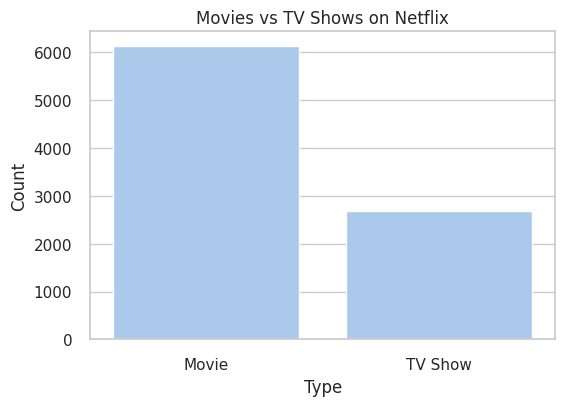

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='type',data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

**(b).Top 10 Countries Producing Netflix Content**

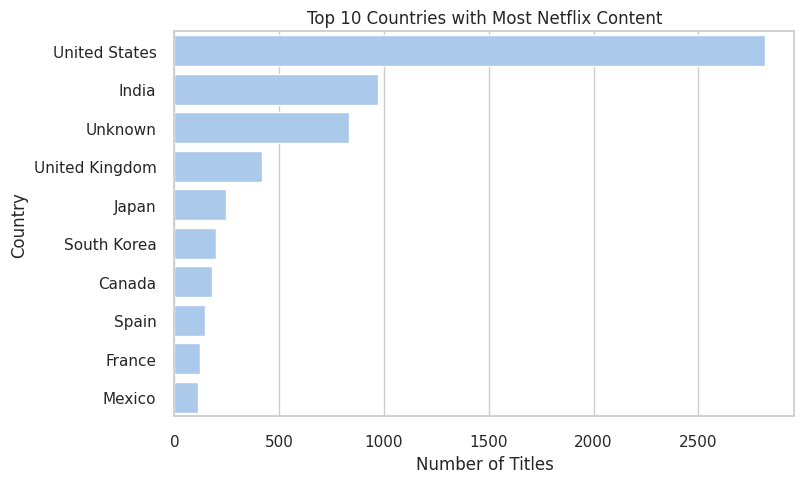

In [30]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

**(c).Top 10 Most Common Genres**

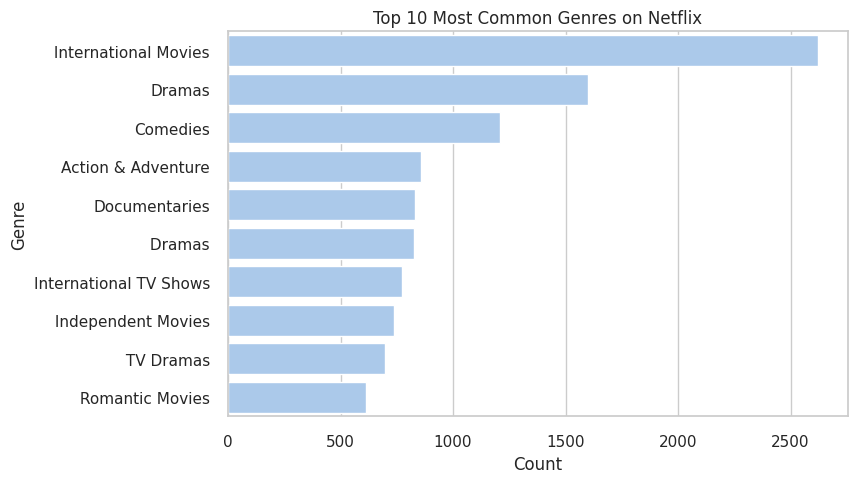

In [31]:
all_genres = df['listed_in'].str.split(',').sum()  # Splitting genres
top_genres = Counter(all_genres).most_common(10)
genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])
plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Genre', data=genre_df)
plt.title("Top 10 Most Common Genres on Netflix")
plt.show()

**(d). Netflix Content Over the Years**

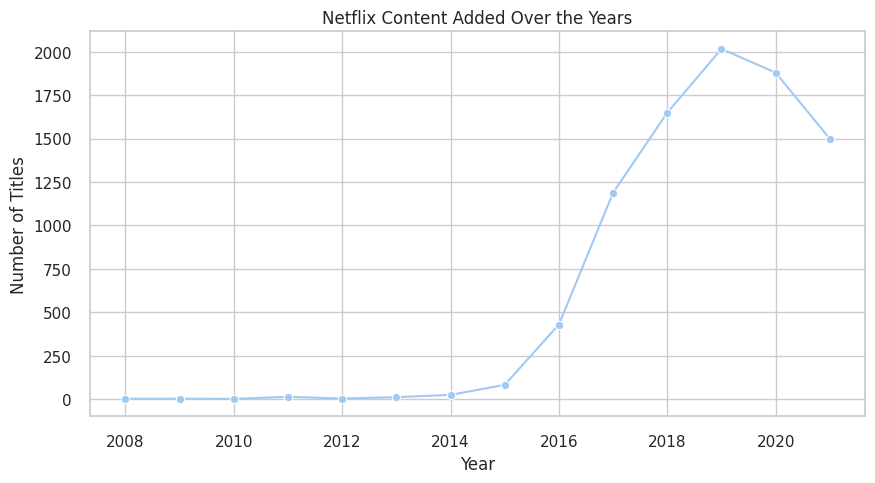

In [32]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
content_per_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker='o')
plt.title("Netflix Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

**(e). Top 10 Most Frequent Actors on Netflix**

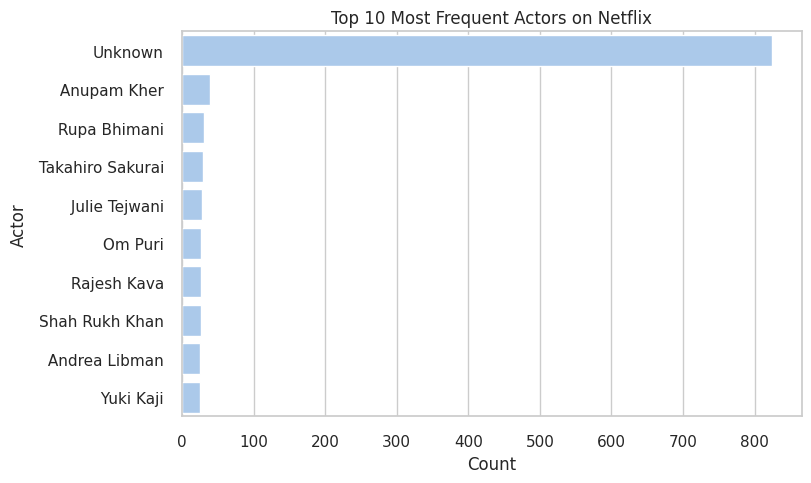

In [33]:
all_actors = df['cast'].str.split(',').sum()
top_actors = Counter(all_actors).most_common(10)
actors_df = pd.DataFrame(top_actors, columns=['Actor', 'Count'])
plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Actor', data=actors_df)
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.show()

**7.KEY INSIGHTS**

In [34]:
#KEY INSIGHTS
print("\n KEY INSIGHTS:")
print(f"1. Netflix has more {df['type'].value_counts().idxmax()} than {df['type'].value_counts().idxmin()}.")
print(f"2. {top_countries.index[0]} produces the most Netflix titles.")
print(f"3. The most common genre is '{genre_df.iloc[0,0]}'.")
print(f"4. Netflix added the highest content in {content_per_year.idxmax()}.")
print(f"5. The most frequent actor on Netflix is '{actors_df.iloc[0,0]}'.")


 KEY INSIGHTS:
1. Netflix has more Movie than TV Show.
2. United States produces the most Netflix titles.
3. The most common genre is ' International Movies'.
4. Netflix added the highest content in 2019.0.
5. The most frequent actor on Netflix is 'Unknown'.
